In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_theme()

In [2]:
df = pd.read_csv('data/Clean_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.drop(df.columns[0] , axis = 1 , inplace = True)

In [5]:
X = df.drop(['price'] , axis = 1)
y = df['price']

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 42
)

In [7]:
X_train.shape

(240122, 10)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240122 entries, 148417 to 121958
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   flight            240122 non-null  object 
 2   source_city       240122 non-null  object 
 3   departure_time    240122 non-null  object 
 4   stops             240122 non-null  object 
 5   arrival_time      240122 non-null  object 
 6   destination_city  240122 non-null  object 
 7   class             240122 non-null  object 
 8   duration          240122 non-null  float64
 9   days_left         240122 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 20.2+ MB


In [9]:
X_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6
36879,Indigo,6E-2193,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13
274531,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,44
166397,Vistara,UK-876,Hyderabad,Night,one,Early_Morning,Bangalore,Economy,10.25,11
272722,Vistara,UK-774,Kolkata,Night,one,Night,Chennai,Business,26.50,5


In [10]:
high_card_col = ['flight']
cat_col = ['airline' , 'source_city' , 'destination_city' , 'arrival_time' , 'departure_time' , 'stops' , 'class']
num_col = ['duration' , 'days_left']

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

transformer = ColumnTransformer([
    ('handle_flight' , OneHotEncoder(max_categories = 10 , sparse_output=False , handle_unknown='infrequent_if_exist') , high_card_col),
    ('handle_cat' , OneHotEncoder(sparse_output=False ,handle_unknown='ignore') , cat_col , ),
    ('handle_num' , StandardScaler() , num_col)
],remainder='passthrough',
verbose_feature_names_out=False)
set_config(transform_output='pandas')

In [12]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed , y_train)
lr.score(X_test_transformed , y_test)

0.911807963511114

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create a much "lighter" version of the model for testing
rf_light = RandomForestRegressor(
    n_estimators=50,      # Start with a much smaller number of trees
    max_depth=10,         # Limit the depth of each tree
    n_jobs=-1,            # Use all cores (this is fine now for one model)
    random_state=42
)

print("Training a lighter Random Forest model...")
# Now try to fit this lighter model
rf_light.fit(X_train_transformed, y_train)

print("Training complete!")

# Check the score
score = rf_light.score(X_test_transformed, y_test)
print(f"Score of the lighter model: {score}")

Training a lighter Random Forest model...
Training complete!
Score of the lighter model: 0.9628238568223827


In [15]:
rf_light.feature_importances_

array([6.05836952e-05, 3.31728371e-06, 4.19110205e-05, 1.05791210e-05,
       3.51517699e-11, 1.85103290e-06, 1.54941537e-05, 1.37984438e-05,
       3.63881597e-06, 9.27251556e-05, 4.33296532e-04, 3.82359941e-03,
       1.34583270e-05, 3.06119615e-04, 8.91174719e-06, 6.46323473e-03,
       4.19754506e-04, 1.65755961e-04, 3.21040366e-03, 7.92142164e-04,
       1.43427398e-03, 1.99229611e-03, 4.26690085e-04, 1.38895327e-04,
       2.86053099e-03, 6.11077561e-04, 1.59132725e-03, 1.53396684e-03,
       2.19572070e-04, 1.84196360e-04, 4.89195748e-04, 4.50970335e-05,
       6.84755458e-05, 3.71191549e-04, 1.49788055e-04, 9.16820081e-05,
       2.17706648e-04, 3.99548964e-06, 1.21084374e-04, 1.53257878e-04,
       7.93705038e-04, 9.70195540e-04, 1.85024621e-05, 4.56984052e-01,
       4.57014255e-01, 4.39733430e-02, 1.16610707e-02])

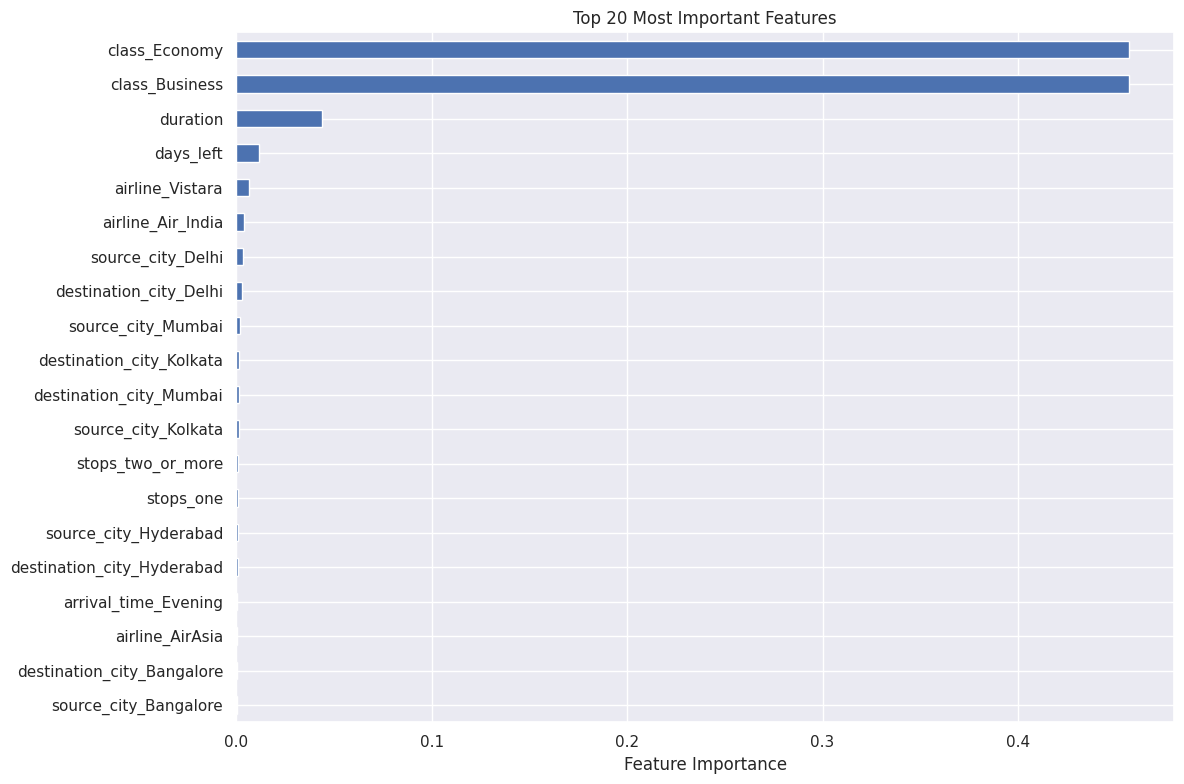

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'transformer' is your fitted ColumnTransformer
# and 'rf_light' is your fitted RandomForestRegressor model

# 1. Get the names of all the features after transformation
feature_names = transformer.get_feature_names_out()

# 2. Get the importance scores from the trained model
importances = rf_light.feature_importances_

# 3. Create a pandas Series to combine feature names and their importance
feature_importance_series = pd.Series(importances, index=feature_names)

# 4. Plot the top 20 most important features
plt.figure(figsize=(12, 8))
feature_importance_series.nlargest(20).sort_values().plot(kind='barh')
plt.title("Top 20 Most Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [27]:
df = pd.read_csv('data/Clean_Dataset.csv')

In [28]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [30]:
df.drop(columns=df.columns[0] , inplace= True , axis =1 )

In [74]:
X = df.loc[df['class'] == 'Economy' , [col for col in df.columns if col != 'class' and col != 'price']]

In [75]:
y = df.loc[df['class'] == 'Economy' , 'price']
y = np.log1p(y)

In [76]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 42
)

In [77]:
high_card_col = ['flight']
cat_col = ['airline' , 'source_city' , 'destination_city' , 'arrival_time' , 'departure_time' , 'stops']
num_col = ['duration' , 'days_left']

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

transformer = ColumnTransformer([
    ('handle_flight' , OneHotEncoder(max_categories = 10 , sparse_output=False , handle_unknown='infrequent_if_exist') , high_card_col),
    ('handle_cat' , OneHotEncoder(sparse_output=False ,handle_unknown='ignore') , cat_col , ),
    ('handle_num' , StandardScaler() , num_col)
],remainder='passthrough',
verbose_feature_names_out=False)
set_config(transform_output='pandas')

In [79]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed , y_train)
lr.score(X_test_transformed , y_test)

0.5933851161629298

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Create a much "lighter" version of the model for testing
rf_light = RandomForestRegressor(
    n_estimators=50,      # Start with a much smaller number of trees
    max_depth=10,         # Limit the depth of each tree
    n_jobs=-1,            # Use all cores (this is fine now for one model)
    random_state=42
)

print("Training a lighter Random Forest model...")
# Now try to fit this lighter model
rf_light.fit(X_train_transformed, y_train)

print("Training complete!")

# Check the score
score = rf_light.score(X_test_transformed, y_test)
print(f"Score of the lighter model: {score}")

Training a lighter Random Forest model...
Training complete!
Score of the lighter model: 0.7913614843812855


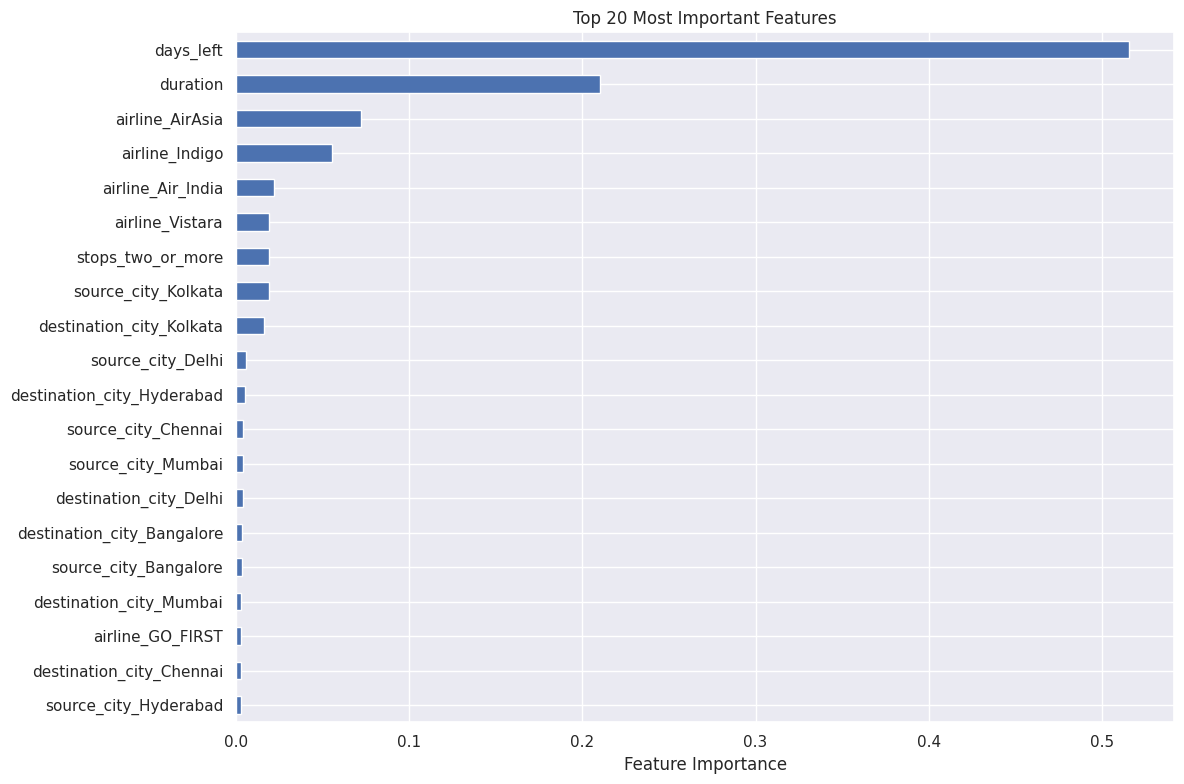

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'transformer' is your fitted ColumnTransformer
# and 'rf_light' is your fitted RandomForestRegressor model

# 1. Get the names of all the features after transformation
feature_names = transformer.get_feature_names_out()

# 2. Get the importance scores from the trained model
importances = rf_light.feature_importances_

# 3. Create a pandas Series to combine feature names and their importance
feature_importance_series = pd.Series(importances, index=feature_names)

# 4. Plot the top 20 most important features
plt.figure(figsize=(12, 8))
feature_importance_series.nlargest(20).sort_values().plot(kind='barh')
plt.title("Top 20 Most Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()